# Testing projections of vectors to various bases

In [1]:
import numpy as np
import scipy as sp
import math
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
import pdb

import sys
sys.path.append("../../")
import pyApproxTools as pat
importlib.reload(pat)

%matplotlib inline

### Project sin to affine basis
Here the basis is of functions $f_a = U(x-a) (x-a)$, where $U$ is the Heaveside function, for which we find $\omega_a$, the normalised representer in $H_0^1$, i.e
$$
\langle f, \omega_a\rangle = \int_0^1 f(x) \, U(x-a) (x-a) \, \mathrm{d} x
$$
The basis is the span of $\omega_0, \omega_{1/n}, \omega_{2/n},\ldots,\omega_{1-1/n}$, i.e. is of rank $n$.

1782363.58789


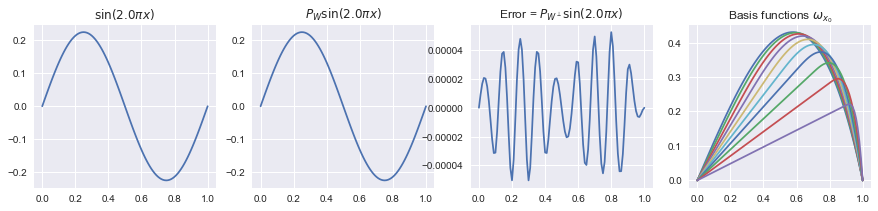

In [12]:
np.random.seed(3)

# First create the collection of delta functionals representers at 8 random points
n = 10
points = np.arange(0, 1+1/n, 1/n)#np.random.random(n)
vecs = []
for i in range(n):
    vecs.append(pat.FuncVector(params=[[points[i]]], coeffs=[[1.0]], funcs=['H1UIAffine']))

# Create the Basis class, instantiated with the function vectors
W = pat.Basis(vecs)

# Create the function we wish to project / approximate
v = pat.FuncVector(params=[[2]],coeffs=[[1]],funcs=['H1UISin'])

# And project! Easy as that. v_W is the projected vector
v_W = W.project(v)
print(np.linalg.cond(W.G))

xs = np.arange(0.0, 1.01, 0.01)
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(1, 4, 1, title=v.latex_str())
plt.plot(xs, v.evaluate(xs))
ax = fig.add_subplot(1, 4, 2, title='$P_W $' + v.latex_str())
plt.plot(xs, v_W.evaluate(xs))
ax = fig.add_subplot(1, 4, 3, title=r'Error = $P_{W^\perp}$' + v.latex_str())
plt.plot(xs, (v - v_W).evaluate(xs))
ax = fig.add_subplot(1, 4, 4, title='Basis functions $\omega_{x_0}$')
for vec in vecs:
    plt.plot(xs, vec.evaluate(xs))
plt.show()

### Project delta function to affine basis



1782363.58789


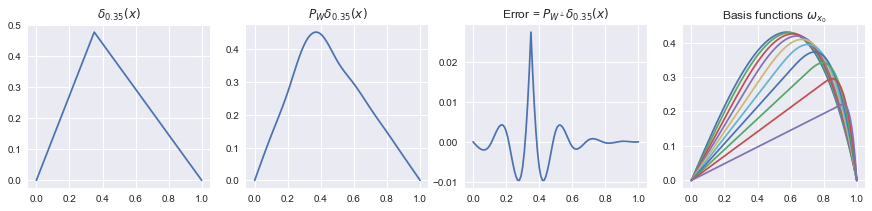

-4.1486700184651533e-05

In [13]:
np.random.seed(3)

# First create the collection of delta functionals representers at 8 random points
n = 10
points = np.arange(0, 1 + 1/n, 1/n)#np.random.random(n)
vecs = []
for i in range(n):
    vecs.append(pat.FuncVector(params=[[points[i]]], coeffs=[[1.0]], funcs=['H1UIAffine']))

# Create the Basis class, instantiated with the function vectors
W = pat.Basis(vecs)

# Create the function we wish to project / approximate
v = pat.FuncVector(params=[[(0.3,0.4)]],coeffs=[[1]],funcs=['H1UIAvg'])
v = pat.FuncVector(params=[[0.35]],coeffs=[[1]],funcs=['H1UIDelta'])
# And project! Easy as that. v_W is the projected vector
v_W = W.project(v)
print(np.linalg.cond(W.G))

xs = np.arange(0.0, 1.01, 0.01)
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(1, 4, 1, title=v.latex_str())#'$\delta_{0.35}(2 \pi x)$')
plt.plot(xs, v.evaluate(xs))
ax = fig.add_subplot(1, 4, 2, title='$P_W $' + v.latex_str())
plt.plot(xs, v_W.evaluate(xs))
ax = fig.add_subplot(1, 4, 3, title=r'Error = $P_{W^\perp}$' + v.latex_str())
plt.plot(xs, (v - v_W).evaluate(xs))
ax = fig.add_subplot(1, 4, 4, title='Basis functions $\omega_{x_0}$')
for vec in vecs:
    plt.plot(xs, vec.evaluate(xs))
plt.show()

np.mean(v.evaluate(xs) - v_W.evaluate(xs))

### Project affine to delta function basis

../../pyApproxTools/vector.py:506: RuntimeWarning: divide by zero encountered in true_divide
  result = 1.0 / np.sqrt(self._aff_ordered_dot(p, p))


45.6769294206


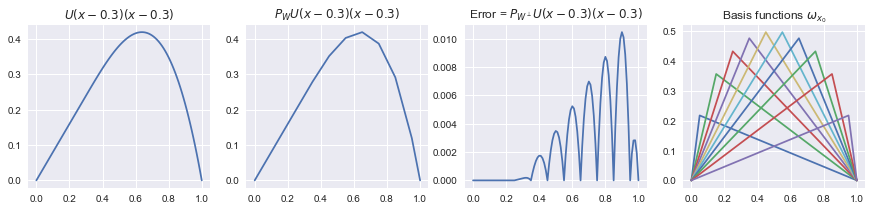

0.0024975649675193878

In [14]:
np.random.seed(3)

# First create the collection of delta functionals representers at 8 random points
n = 10
points = np.arange(0.5/n, 1 + 1/n, 1/n)#np.random.random(n)
vecs = []
for i in range(n):
    vecs.append(pat.FuncVector(params=[[points[i]]], coeffs=[[1.0]], funcs=['H1UIDelta']))

# Create the Basis class, instantiated with the function vectors
W = pat.Basis(vecs)

# Create the function we wish to project / approximate
v = pat.FuncVector(params=[[(0.3,0.4)]],coeffs=[[1]],funcs=['H1UIAvg'])
v = pat.FuncVector(params=[[0.35]],coeffs=[[1]],funcs=['H1UIDelta'])
v = pat.FuncVector(params=[[(0.3,1.0)]],coeffs=[[1]],funcs=['H1UIAffine'])
# And project! Easy as that. v_W is the projected vector
v_W = W.project(v)
print(np.linalg.cond(W.G))

xs = np.arange(0.0, 1.01, 0.01)
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(1, 4, 1, title=v.latex_str())#'$\delta_{0.35}(2 \pi x)$')
plt.plot(xs, v.evaluate(xs))
ax = fig.add_subplot(1, 4, 2, title='$P_W $' + v.latex_str())
plt.plot(xs, v_W.evaluate(xs))
ax = fig.add_subplot(1, 4, 3, title=r'Error = $P_{W^\perp}$' + v.latex_str())
plt.plot(xs, (v - v_W).evaluate(xs))
ax = fig.add_subplot(1, 4, 4, title='Basis functions $\omega_{x_0}$')
for vec in vecs:
    plt.plot(xs, vec.evaluate(xs))
plt.show()

np.mean(v.evaluate(xs) - v_W.evaluate(xs))

### Project local avg to affine basis

209099639.888


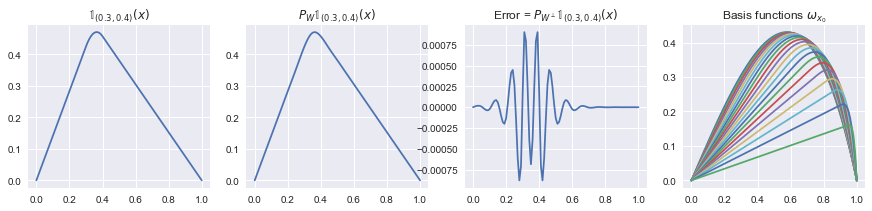

In [15]:
# First create the collection of delta functionals representers at 8 random points
n = 20
points = np.arange(0, 1 + 1/n, 1/n)#np.random.random(n)
vecs = []
for i in range(n):
    vecs.append(pat.FuncVector(params=[[points[i]]], coeffs=[[1.0]], funcs=['H1UIAffine']))

# Create the Basis class, instantiated with the function vectors
W = pat.Basis(vecs)

# Create the function we wish to project / approximate
v = pat.FuncVector(params=[[2]],coeffs=[[1]],funcs=['H1UISin'])
v = pat.FuncVector(params=[[(0.3,0.4)]],coeffs=[[1]],funcs=['H1UIAvg'])

# And project! Easy as that. v_W is the projected vector
v_W = W.project(v)
print(np.linalg.cond(W.G))

xs = np.arange(0.0, 1.01, 0.01)
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(1, 4, 1, title=v.latex_str())#'$\delta_{0.35}(2 \pi x)$')
plt.plot(xs, v.evaluate(xs))
ax = fig.add_subplot(1, 4, 2, title='$P_W $' + v.latex_str())
plt.plot(xs, v_W.evaluate(xs))
ax = fig.add_subplot(1, 4, 3, title=r'Error = $P_{W^\perp}$' + v.latex_str())
plt.plot(xs, (v - v_W).evaluate(xs))
ax = fig.add_subplot(1, 4, 4, title='Basis functions $\omega_{x_0}$')
for vec in vecs:
    plt.plot(xs, vec.evaluate(xs))
plt.show()

### Project things to a hat basis

The hat basis is interesting - it is made using a linear combination of affine functions (otherwise the derivation of the Riesz representer is long and tiresome with lots of cases)

1352565626.3


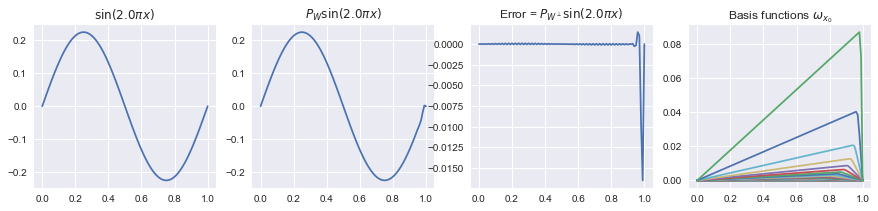

In [16]:
np.random.seed(3)

# First create the collection of delta functionals representers at 8 random points
n = 50
points = np.arange(0, 1, 1/n)#np.random.random(n)
vecs = []
for i in range(n):
    vecs.append(pat.FuncVector(params=[[(points[i], points[i]+1/n)]], coeffs=[[1.0]], funcs=['H1UIHat']))

# Create the Basis class, instantiated with the function vectors
W = pat.Basis(vecs)

# Create the function we wish to project / approximate
v = pat.FuncVector(params=[[2]],coeffs=[[1]],funcs=['H1UISin'])
#v = pat.FuncVector(params=[[(0.3,0.4)]],coeffs=[[1]],funcs=['H1UIAvg'])
#v = pat.FuncVector(params=[[(0.3,0.4)]],coeffs=[[1]],funcs=['H1UIHat'])

# And project! Easy as that. v_W is the projected vector
W.make_grammian()
#print(W.G)
v_W = W.project(v)
print(np.linalg.cond(W.G))

xs = np.arange(0.0, 1.01, 0.01)
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(1, 4, 1, title=v.latex_str())#'$\delta_{0.35}(2 \pi x)$'
plt.plot(xs, v.evaluate(xs))
ax = fig.add_subplot(1, 4, 2, title='$P_W $' + v.latex_str())
plt.plot(xs, v_W.evaluate(xs))
ax = fig.add_subplot(1, 4, 3, title=r'Error = $P_{W^\perp}$' + v.latex_str())
plt.plot(xs, (v - v_W).evaluate(xs))
ax = fig.add_subplot(1, 4, 4, title='Basis functions $\omega_{x_0}$')
for vec in vecs:
    plt.plot(xs, vec.evaluate(xs))
plt.show()

### Project to local avg basis

559.073104662


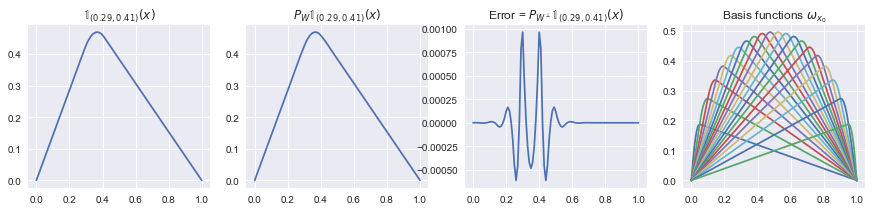

0.019160955343221774


In [2]:
# First create the collection of delta functionals representers at 8 random points
n = 20
points = np.arange(0, 1 + 1/n, 1/n)
vecs = []
for i in range(n):
    vecs.append(pat.FuncVector(params=[[(points[i], points[i+1])]], coeffs=[[1.0]], funcs=['H1UIAvg']))

# Create the Basis class, instantiated with the function vectors
W = pat.Basis(vecs)

# Create the function we wish to project / approximate
v = pat.FuncVector(params=[[(0.29,0.41)]],coeffs=[[1]],funcs=['H1UIAvg'])
#v = pat.FuncVector(params=[[4.0]],coeffs=[[1]],funcs=['H1UISin'])

# And project! Easy as that. v_W is the projected vector
v_W = W.project(v)
print(np.linalg.cond(W.G))

xs = np.arange(0.0, 1.01, 0.01)
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(1, 4, 1, title=v.latex_str())#'$\delta_{0.35}(2 \pi x)$')
plt.plot(xs, v.evaluate(xs))
ax = fig.add_subplot(1, 4, 2, title='$P_W $' + v.latex_str())
plt.plot(xs, v_W.evaluate(xs))
ax = fig.add_subplot(1, 4, 3, title=r'Error = $P_{W^\perp}$' + v.latex_str())
plt.plot(xs, (v - v_W).evaluate(xs))
ax = fig.add_subplot(1, 4, 4, title='Basis functions $\omega_{x_0}$')
for vec in vecs:
    plt.plot(xs, vec.evaluate(xs))
plt.show()

print((v - v_W).norm())

### Project to sinusoid basis

1.0


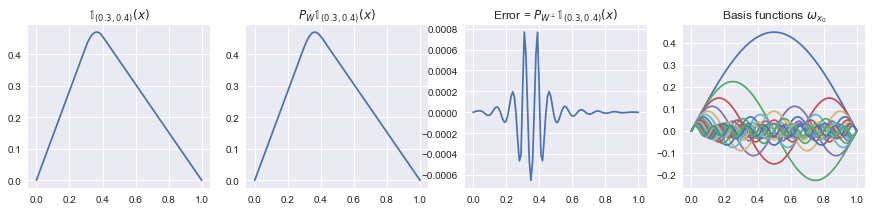

2.7115911850349537e-07

In [7]:
np.random.seed(3)

# First create the collection of delta functionals representers at 8 random points
n = 20
vecs = []
for i in range(1,n+1):
    vecs.append(pat.FuncVector(params=[[i]], coeffs=[[1.0]], funcs=['H1UISin']))

# Create the Basis class, instantiated with the function vectors
W = pat.Basis(vecs)

# Create the function we wish to project / approximate
v = pat.FuncVector(params=[[(0.3,0.4)]],coeffs=[[1]],funcs=['H1UIAvg'])
# And project! Easy as that. v_W is the projected vector
v_W = W.project(v)
print(np.linalg.cond(W.G))

xs = np.arange(0.0, 1.01, 0.01)
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(1, 4, 1, title=v.latex_str())#'$\delta_{0.35}(2 \pi x)$')
plt.plot(xs, v.evaluate(xs))
ax = fig.add_subplot(1, 4, 2, title='$P_W $' + v.latex_str())
plt.plot(xs, v_W.evaluate(xs))
ax = fig.add_subplot(1, 4, 3, title=r'Error = $P_{W^\perp}$' + v.latex_str())
plt.plot(xs, (v - v_W).evaluate(xs))
ax = fig.add_subplot(1, 4, 4, title='Basis functions $\omega_{x_0}$')
for vec in vecs:
    plt.plot(xs, vec.evaluate(xs))
plt.show()

np.mean(v.evaluate(xs) - v_W.evaluate(xs))